In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bisezione(a, b, f, tolx, xTrue):

    if f(a)*f(b) >0:
        print('Non esiste radice in [a,b]')
        return()
    
    k= 100
    vecErr= np.zeros(k)
    i=0
    while(b-a) > tolx + 1.e-16 * max(a,b):
        # if (b-a < tolx+1.e-16*max(a,b)):
        #     print('Errore: l\'intervallo è troppo piccolo ')
        #     return ('Errore', i, k, vecErr)
        i= i+1
        c= a + (b - a) /2
        vecErr[i-1] = abs(c - xTrue)
        if abs(f(c)) < 1.e-15:
            x= c
            return(x, i, k, vecErr)
        else:
            if f(a) * f(c) < 0:
                b= c
            else:
                a= c
    x= c
    return(x, i, k, vecErr)



In [3]:
''' Metodo di Newton'''

def newton( f, df, tolf, tolx, maxit, xTrue, x0=0):
  
  err=np.zeros(maxit, dtype=float)
  vecErrore=np.zeros( (maxit,1), dtype=float)
  
  
  i=0
  err[0]=tolx+1
  vecErrore[0] = np.abs(x0-xTrue)
  x=x0

  while (i<maxit and (err[i]>tolx or abs(f(x))>tolf) ): # scarto assoluto tra iterati
    x_new= f(x)
    err[i+1]=abs(x_new-x)
    vecErrore[i+1]=abs(x_new-xTrue)
    i=i+1
    x=x_new
    
  err=err[0:i]      
  vecErrore = vecErrore[0:i]
  return (x, i, err, vecErrore)  

In [4]:
''' Metodo delle approssimazioni successive'''
def succ_app(f, g, tolf, tolx, maxit, xTrue, x0=0):
  
  err=np.zeros(maxit+1, dtype=np.float64)
  vecErrore=np.zeros(maxit+1, dtype=np.float64)
  
  
  i= 0
  err[0]= tolx + 1
  vecErrore[0] = np.abs(x0 - xTrue)
  x = x0

  while (i < maxit and (err[i] > tolx or abs(f(x)) > tolf) ): 
    x_new= g(x)
    err[i+1]= abs(x_new - x)
    i+= 1
    x= x_new
    
  err = err[0 : i] 
  vecErrore = vecErrore[0 : i]
  return (x, i, err, vecErrore) 

In [8]:
'''creazione del problema 1'''
f1= lambda x: x**3+4*x*np.cos(x)-2
df1= lambda x: (2-x**3)/(4*np.cos(x))
x1true= 0.536839
f1true= f1(x1true)
print(f1true)

a1= 0.0
b1= 2.0
tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

1.436646284158627e-06


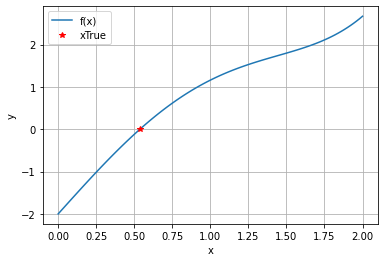

In [9]:
x_plot= np.linspace(a1,b1, 101)
f_plot= f1(x_plot)
plt.plot(x_plot, f_plot)
plt.plot(x1true, f1(x1true), '*', color='red')
plt.legend(("f(x)","xTrue"))
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

In [ ]:
''' Calcolo soluzione tramite Bisezione, Newton e Approssimazioni Successive'''
(xBise, iter_bise, err, vecErr_bise)= bisezione(a1, b1, f1, 1.e-6, x1true) 
print('Metodo di bisezione \n x =', xBise,'\n iter_bise=',iter_bise  ,'\n iter_max=', maxit)
print('\n')

(xNew, iter_new, err, vecErr_new)= newton(f1, df1, tolf, tolx, maxit, f1true, x0)
print('Metodo di Newton \n x =', xNew,'\n iter_new=', iter_new, '\n err_new=', vecErr_new)
print('\n')




In [17]:
(sol_n, iter_n, err_n, vecErr)= succ_app(f1, df1, tolf, tolx, maxit, x1true, x0)
print('Metodo approssimazioni successive \n x =',sol_n,'\n iter_new=', iter_n)


Metodo approssimazioni successive 
 x = 0.5368385515655376 
 iter_new= 10


In [18]:
'''creazione del problema 2'''
f2= lambda x: x-x**(1/3)-2
df2= lambda x: x**(1/3) +2
x2true= 3.5214
f2true= f2(x2true)
print(f2true)

a2= 3.0
b2= 5.0
tolx= 10**(-10)
tolf = 10**(-6)
maxit=100
x0= 0

1.7370704914476676e-05


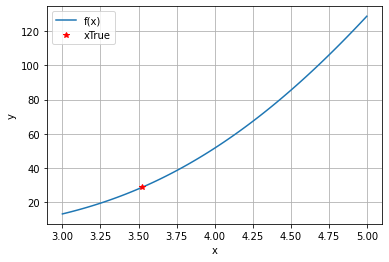

In [19]:
x_plot= np.linspace(a2,b2, 101)
f_plot= f1(x_plot)
plt.plot(x_plot, f_plot)
plt.plot(x2true, f1(x2true), '*', color='red')
plt.legend(("f(x)","xTrue"))
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

In [27]:
''' Calcolo soluzione tramite Bisezione, Newton e Approssimazioni Successive'''
(xBise, iter_bise, err, vecErr_bise)= bisezione(a2, b2, f2, tolf, x2true) 
print('Metodo di bisezione \n x =', xBise,'\n iter_bise=',iter_bise  ,'\n iter_max=', maxit)
print('\n')

(xNew, iter_new, err, vecErr_new)= newton(f2, df2, tolf, tolx, 0, f2true, x0)
print('Metodo di Newton \n x =', xNew,'\n iter_new=', iter_new, '\n err_new=', vecErr_new)
print('\n')

Metodo di bisezione 
 x = 3.5213804244995117 
 iter_bise= 21 
 iter_max= 100




IndexError: index 0 is out of bounds for axis 0 with size 0

In [24]:
(sol_n, iter_n, err_n, vecErr)= succ_app(f2, df2, tolf, tolx, maxit, x2true, x0)
print('Metodo approssimazioni successive \n x =',sol_n,'\n iter_new=', iter_n)


Metodo approssimazioni successive 
 x = 3.52137970680148 
 iter_new= 15
